In [ ]:
# !pip install pmdarima
!pip list

In [1]:
# from unittest import skip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn 
import scipy.stats as st
    
# help(sklearn)
a = [3,3.5,2, 1.8, 1]
b = st.norm(3,0.8).rvs(100)
# print(help(st.norm))
print(np.mean(a), np.std(a)) 
r = st.shapiro(a)
r2 = st.shapiro(b)
print(r,r2)
ret =  st.ttest_1samp(a,2.0, alternative='less')
r_eqv = st.levene(b, a)
r_eqv2 = st.bartlett(b, a)
print(r_eqv,r_eqv2)
ret =  st.ttest_ind(a,b, equal_var=True )
print(ret)

2.2600000000000002 0.8890444308357147
ShapiroResult(statistic=0.963385283946991, pvalue=0.8313377499580383) ShapiroResult(statistic=0.989944577217102, pvalue=0.6601133346557617)
LeveneResult(statistic=0.042865927693116736, pvalue=0.8363866899344354) BartlettResult(statistic=0.19814946040494114, pvalue=0.6562187128202435)
Ttest_indResult(statistic=-1.8536857571416048, pvalue=0.06664593657439209)


In [238]:
import scipy, statsmodels
from statsmodels.tsa import arima,api 

ll = [i for i in dir(scipy.stats) if "ba" in i]
ll

['barnard_exact', 'bartlett', 'bayes_mvs', 'crystalball', 'mstats_basic']

## **4 전처리** 

In [46]:
# 기본적인 모듈, EDA시 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import statsmodels.tsa

# 전처리 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
# pca = PCA( n_components = 4) 
# pca_fit = pca.fit(x)
# print("고유 값 : ", pca.singular_values_)
# print("분산 설명력: ", pca.explained_variance_ratio_)

ll = [i for i in dir(sklearn.metrics) if "error" in i ]
stats = [i for i in dir(statsmodels.tsa)]
# 
df = pd.read_csv("./data/iris.csv")

## 4 머신러닝 문제 푸는 순서 

### 4-1  데이터 확인 
- 독립변수, 종속변수 존재확인, 각 변수의 타입확인(이산형, 범주형), 적용가능한 분석 모델 결정 회귀/분류/비지도학습
- 종속변수, target , 법주형 

In [224]:
# 변수확인
df.info()
## 결측치 있는지 확인 
df.isna().sum()
df.head()
### 목적 변수, 결과 변수 확인 

## 데이터 상관관계 
df_corr = df.drop("target", axis = 1).corr()
df_corr = df_corr.unstack()

## 상관도가 제일 높은 순서대로.. 
df_corr = pd.DataFrame(df_corr).reset_index()
df_corr.columns = ["clm1","clm2","corr"]
df_corr = df_corr[df_corr["corr"] != 1]
df_corr.sort_values(["clm1","corr"], ascending=False).drop_duplicates("clm1")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


clm2
clm1         corr                   
petal length -0.420516   sepal width
              0.871754  sepal length
              0.962757   petal width
petal width  -0.356544   sepal width
              0.817954  sepal length
              0.962757  petal length
sepal length -0.109369   sepal width
              0.817954   petal width
              0.871754  petal length
sepal width  -0.420516  petal length
             -0.356544   petal width
             -0.109369  sepal length

### 4-2 데이터 분할 :
- 학습, 검정, 평가 세트 80:10:10
- 교차 검증방법 적용 


In [49]:
#4-2
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

x = df.drop("target", axis=1)
targets = df["target"].unique()
y = df["target"].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
type(x), type(x_train)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

### 4-3 전처리 , 표준화 또는 정규화 적용 
- 독립변수의 법주형 자료를 원핫인코딩 
- 결측치 및 이상치 확인후 처리 

In [57]:
#4-3
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

type(x), type(x_train), type(scaled_x_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame, numpy.ndarray)

### 4-4 모델학습, 회귀/분류/비지도 학습 중 다양한 알고리즘 
### 4-4-1. 분류 모델 

In [70]:
# 4-4 분류 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report

model  = LogisticRegression(penalty='none', multi_class = 'multinomial', random_state=92)
model.fit(scaled_x_train, y_train)
pred_train = model.predict(scaled_x_train)
acc = model.score(scaled_x_train, y_train)
acc, pred_train


(0.9833333333333333,
 array([0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0,
        2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1,
        0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1,
        2, 1, 2, 2, 2, 2, 1, 2, 0, 0], dtype=int64))

In [223]:
### 분류 모델 종류 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB 

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# 비지도 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

### 4-4-2 회귀 모델 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None
Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64
           mpg       cyl      disp        hp      d

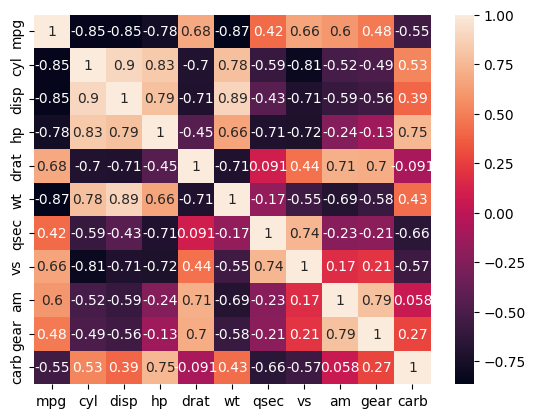

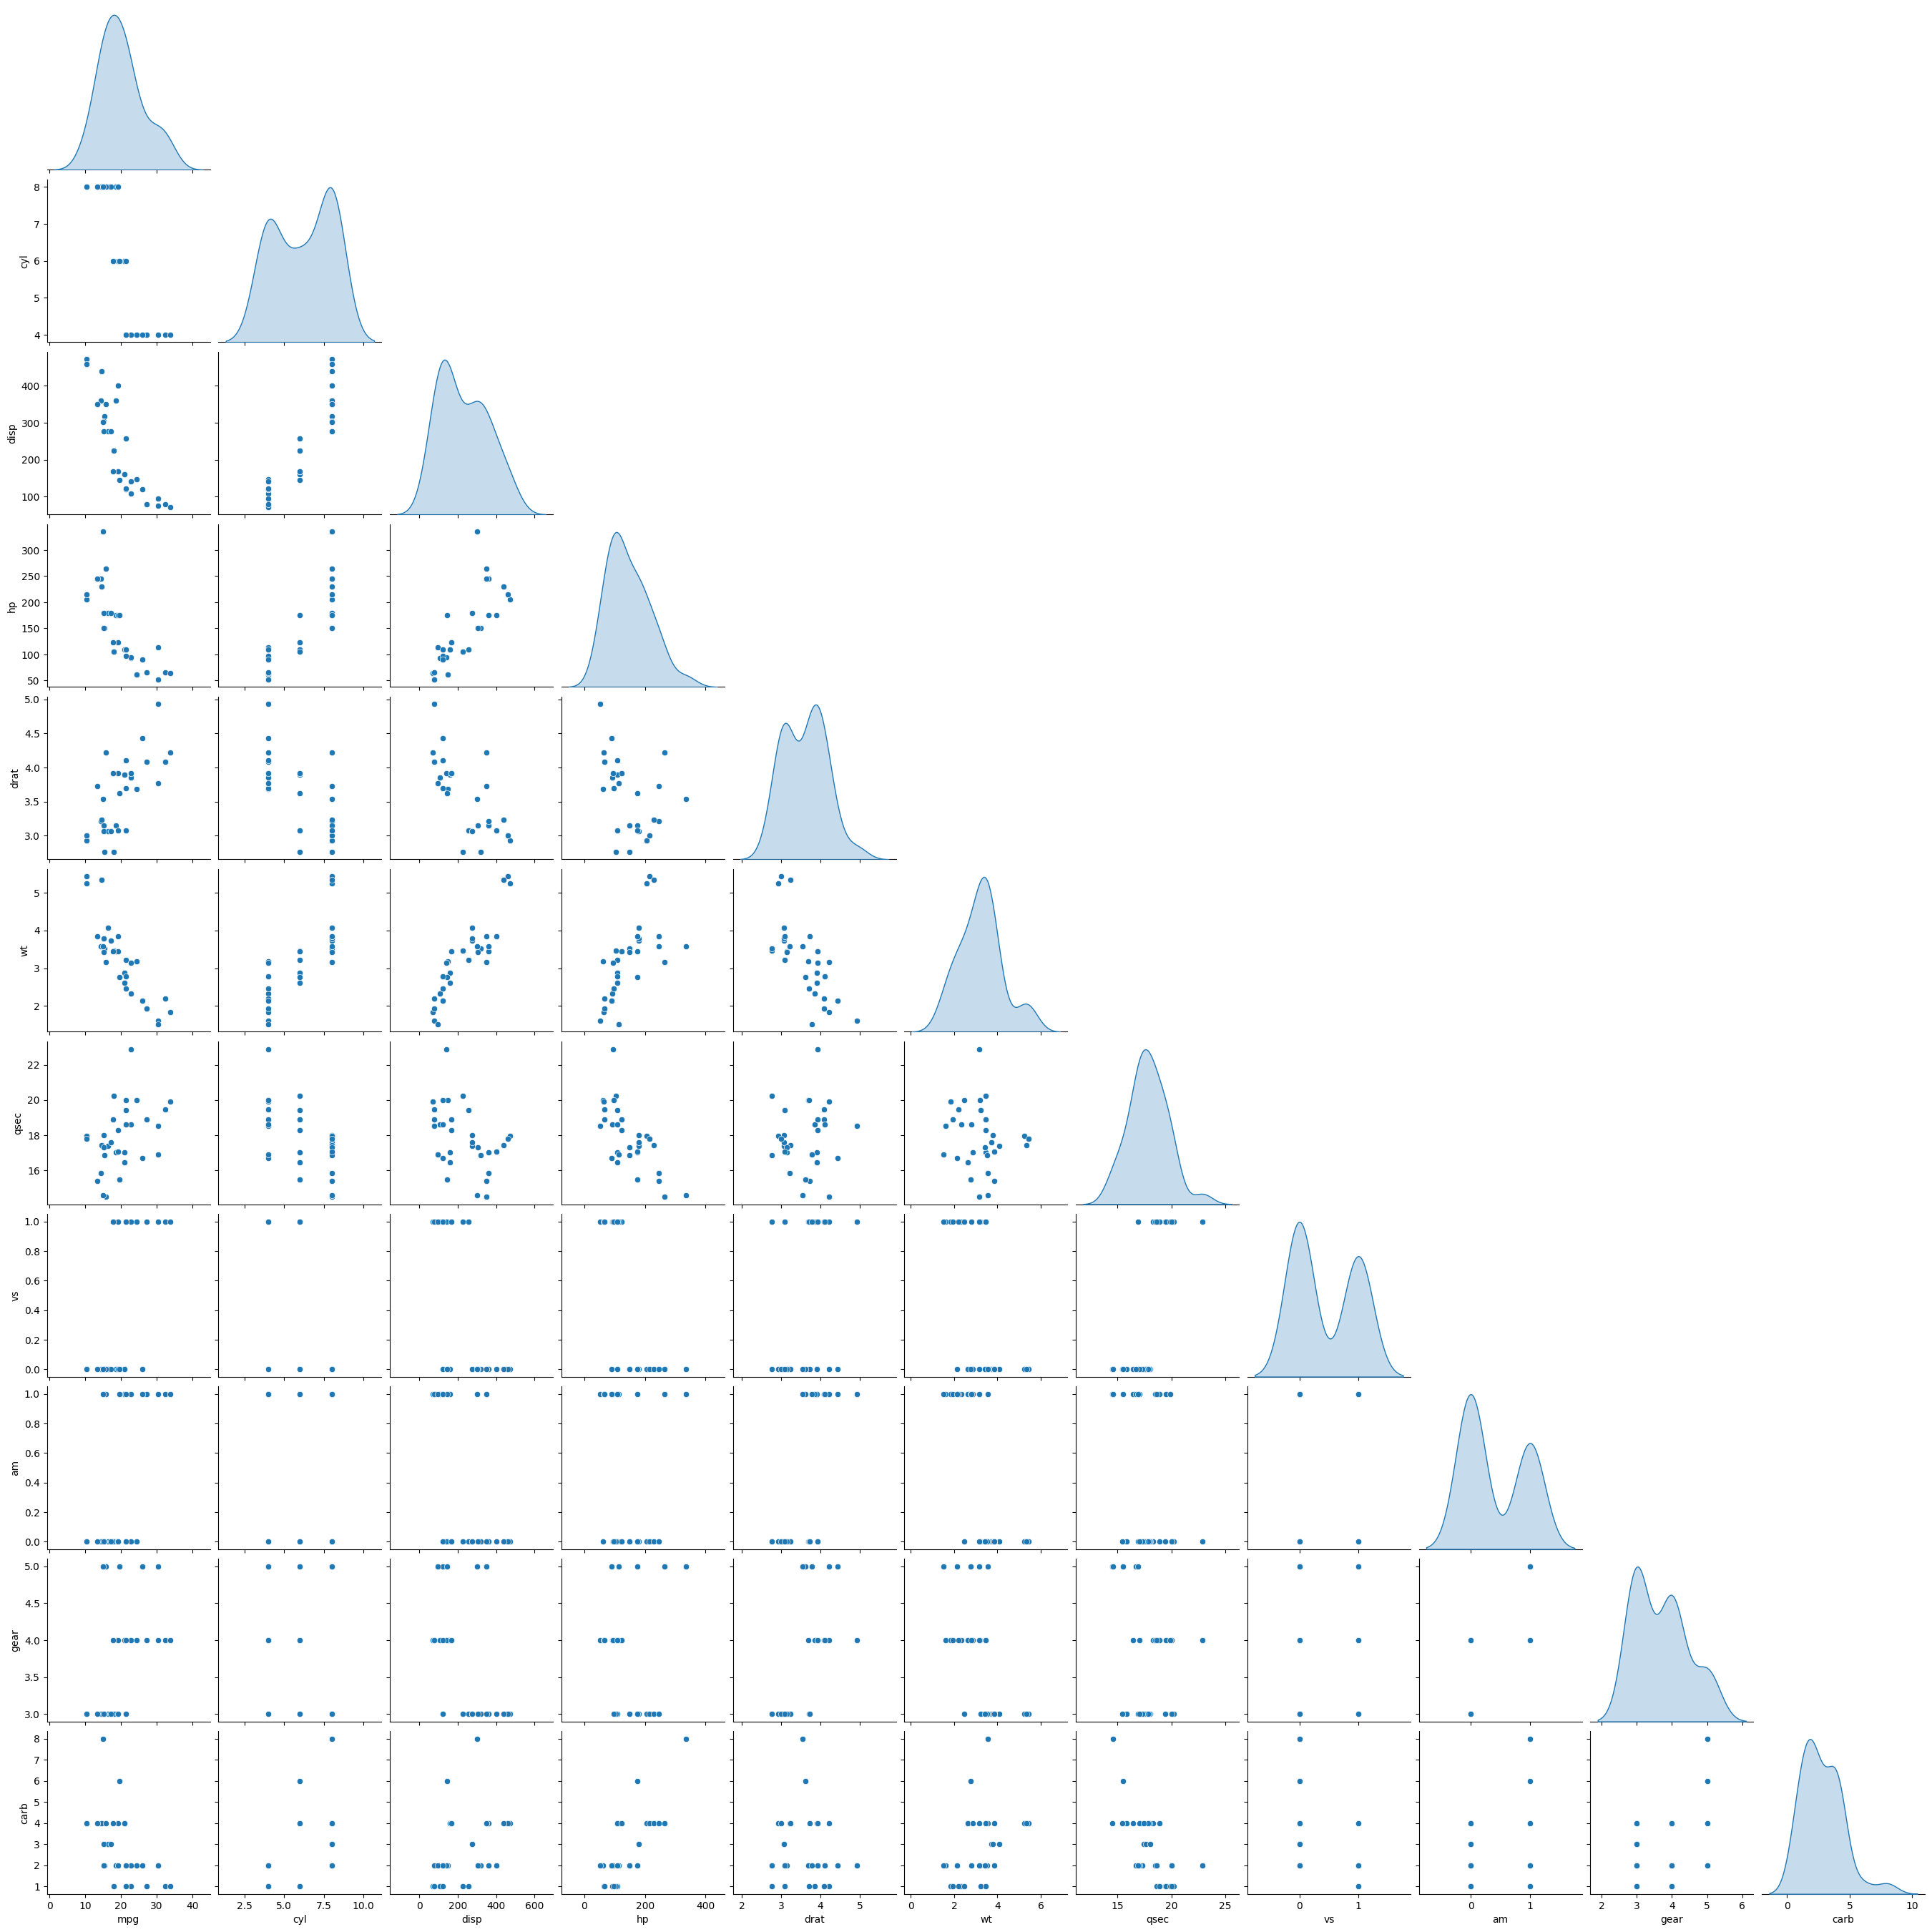

In [219]:
## 4-4 회귀 
## 회귀 분석 예시 
from sklearn.linear_model import LogisticRegression, LinearRegression
# x.drop("sepal length", axis = 1, inplace=True)
mtcars = pd.read_csv("./data/mtcars.csv")

print(mtcars.info())
print(mtcars.isna().sum())
corr = mtcars.corr()
print(corr)
import seaborn as sns 
# fig, ax = plt.subplots(2,1, figsize=(10,10))
# plt.subplot(2,1,1)

sns.heatmap(corr,  annot=True)
plt.show()
# plt.subplot(2,2,2)
sns.pairplot(mtcars.drop(["Unnamed: 0"],axis = 1), corner=True, diag_kind='kde')
plt.show()              

x = mtcars.drop(["Unnamed: 0","mpg"], axis = 1)
y = mtcars["mpg"]

train_x, test_x, train_y, test_y = train_test_split(x,y, random_state=92, test_size=0.2)

In [225]:
lr= LinearRegression()
train_x.shape, train_y.shape
lr.fit(train_x, train_y)

r2 = lr.score(train_x, train_y)
print(r2) 
print(lr.coef_, lr.intercept_)

pred_test = lr.predict(test_x)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(test_y, pred_test)
mse = mean_squared_error(test_y, pred_test)
rmse = np.sqrt(mse)

print(mae, mse, rmse)

# plt.figure(figsize=(10,10))
# sns.heatmap(corr, annot= True)
# plt.show()
# corr.columns.name ="h_corr"
# corr

# corr_v = corr.unstack()
# # print(type(corr_v))
# corr_v = pd.DataFrame(corr_v).reset_index()
# corr_v.columns = ["clm1","clm2","corr"]
# corr_v = corr_v[ corr_v["corr"] != 1.0]
# corr_v.sort_values(["clm1","corr"], ascending=False).drop_duplicates("clm1",keep='first').reset_index(drop=True)


0.9027875177293994
[ 0.00496226  0.01024021 -0.01814205 -0.42159131 -4.12784983  0.73074657
  0.79492077  3.0301547   0.48336887 -0.22770481] 19.142967817330458
2.7814066117180594 10.366079197371564 3.2196396067528372


In [222]:
### 회귀 모델 종류 
from sklearn.linear_model import ARDRegression,BayesianRidge,GammaRegressor,Hinge,HuberRegressor, \
QuantileRegressor,SGDRegressor, LinearRegression, ElasticNet,Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### 4-4-3 Voting Classifier
여러 모델을 사용하여 투표하여 최종 결과물을 만들어 내다. 

In [121]:
# 4-4-3 voting classifier는 다양한 모델을 사용하여 soft voting, hard voting해서 결과를 만들어낸다. 

from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import VotingRegressor
# help(VotingRegressor)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X))
# eclf1.named_estimators
print(f"{clf1.fit(X,y).predict(X)}, {clf2.fit(X,y).predict(X)},{eclf1.estimators_[2].fit(X,y).predict(X)}")

[1 1 1 2 2 2]
[1 1 1 2 2 2], [1 1 1 2 2 2],[1 1 1 2 2 2]


### 4-5. 성능 평가
- 평가세트에 대한 최종 모델을 적용 
- 평가세트에 대한 정확도를 머신러닝 최종 모델 적용

In [229]:
# 4-5 , 성능 평가 
from sklearn.metrics import accuracy_score, precision_score, classification_report, mean_absolute_error, mean_squared_error

pred_test= model.predict(scaled_x_test)

acc = accuracy_score(y_test, pred_test)
# recall = precision_score(y_train, pred_train)
print(acc)
class_rep = classification_report(y_test, pred_test, digits=3)
print(class_rep)

0.9666666666666667
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     0.909     0.952        11
           2      0.875     1.000     0.933         7

    accuracy                          0.967        30
   macro avg      0.958     0.970     0.962        30
weighted avg      0.971     0.967     0.967        30



In [175]:
# date range 
import pandas as pd 

df =pd.date_range("2000-01-01","2020-12-01", freq='MS')
df

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=252, freq='MS')

In [9]:
## 불군형 처리 
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

x, y = make_classification(n_samples=2000, n_features=5, weights=[0.3], flip_y=0, n_classes=2)
# x, y = make_classification(n_samples=2000,n_features=5,n_informative=3, n_clusters_per_class=1, n_classes=3,weights=[0.5,0.2])

print(x.shape, y.shape)
# x = pd.DataFrame(x)
# y = pd.DataFrame(y)
s = Counter(y)
print(type(s),s) 

# print(x.info(),y.aligninfo())

# import matplotlib.pyplot as plt

# fig,ax = plt.subplots(5,1)

# ax[0].scatter(y, x[0])
# ax[1].scatter(y, x[1])
# ax[2].scatter(y, x[2])
# ax[3].scatter(y, x[3])
# ax[4].scatter(y, x[4])
# plt.show()

# help(make_classification)

ModuleNotFoundError: No module named 'imblearn'

In [165]:
#언더샘플링
# undersample = RandomUnderSampler(sampling_strategy='majority')
undersample = RandomUnderSampler(sampling_strategy='auto')
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))
# undersample = RandomUnderSampler(sampling_strategy=0.5) 
# x_under2, y_under2 = undersample.fit_resample(x, y)
# print(Counter(y_under2))

Counter({0: 1})


In [167]:
# 오버 샘플링
from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy=0.5) 
oversample = RandomOverSampler(sampling_strategy='auto')
x_over, y_over = oversample.fit_resample(x, y)

print(Counter(y_over))

help(oversample.fit_resample)

Counter({0: 1})
Help on method fit_resample in module imblearn.base:

fit_resample(X, y) method of imblearn.over_sampling._random_over_sampler.RandomOverSampler instance
    Resample the dataset.
    
    Parameters
    ----------
    X : {array-like, dataframe, sparse matrix} of shape                 (n_samples, n_features)
        Matrix containing the data which have to be sampled.
    
    y : array-like of shape (n_samples,)
        Corresponding label for each sample in X.
    
    Returns
    -------
    X_resampled : {array-like, dataframe, sparse matrix} of shape                 (n_samples_new, n_features)
        The array containing the resampled data.
    
    y_resampled : array-like of shape (n_samples_new,)
        The corresponding label of `X_resampled`.



In [154]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority') 
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({1: 1400, 0: 1400})


### **6 머신러닝**

In [3]:
import sklearn.linear_model as lm

# print(dir(lm))
# print(help(lm.QuantileRegressor))
lms = {"ARDRegression":"Bayesian ARD regression","BayesianRidge":"Bayesian ridge regression",
       "ElasticNet":"Linear regression with combined L1 and L2 priors as regularizer",
  "ElasticNetCV":"Elastic Net model with iterative fitting along a regularization path",
  "GammaRegressor":"Generalized Linear Model with a Gamma distribution",
  "HuberRegressor":"L2-regularized linear regression model that is robust to outliers",
  "Lasso":"Linear Model trained with L1 prior as regularizer", 
  "PassiveAggressiveClassifier":"Passive Aggressive Classifier",
       "PoissonRegressor":"Generalized Linear Model with a Poisson distribution",
  "SGDRegressor":"Linear model fitted by minimizing a regularized empirical loss with SGD",
"QuantileRegressor":"Linear regression model that predicts conditional quantiles",
"RANSACRegressor":"이상치에 강건한 회귀모델", 
"TheilSenRegressor":"이상치에 강건한 회귀모델, Theil-Sen 추정량(Theil-Sen Estimator)은 중앙값을 사용하여 추정되는 선형 회귀 모델입니다",
"TweedieRegressor":"Tweedie 분포를 기반으로 한 회귀 모델", "ridge_regression":"ridge regression"
}
print(lms)


{'ARDRegression': 'Bayesian ARD regression', 'BayesianRidge': 'Bayesian ridge regression', 'ElasticNet': 'Linear regression with combined L1 and L2 priors as regularizer', 'ElasticNetCV': 'Elastic Net model with iterative fitting along a regularization path', 'GammaRegressor': 'Generalized Linear Model with a Gamma distribution', 'HuberRegressor': 'L2-regularized linear regression model that is robust to outliers', 'Lasso': 'Linear Model trained with L1 prior as regularizer', 'PassiveAggressiveClassifier': 'Passive Aggressive Classifier', 'PoissonRegressor': 'Generalized Linear Model with a Poisson distribution', 'SGDRegressor': 'Linear model fitted by minimizing a regularized empirical loss with SGD', 'QuantileRegressor': 'Linear regression model that predicts conditional quantiles', 'RANSACRegressor': '이상치에 강건한 회귀모델', 'TheilSenRegressor': '이상치에 강건한 회귀모델, Theil-Sen 추정량(Theil-Sen Estimator)은 중앙값을 사용하여 추정되는 선형 회귀 모델입니다', 'TweedieRegressor': 'Tweedie 분포를 기반으로 한 회귀 모델', 'ridge_regression'

# 통계 파트 - 검정

- 독립변수가 범주형이고, 종속변수가 연속형이면 t 검정, anova (분산분석) 검증을 수행함
  . 정규성, 등분산, ttest_1samp, ttest_ind, ttest_rel, wilcoxn, kruskal, pg.welch_anova, stats.f_oneway, anova_lm
- 독집변수가 범주형이고, 종속변수가 범주형이면 카이제곱 검정을 수행함 
  . 적합성, 독립성, 동질성


## **7.1 통계처리**

In [254]:
# 통계 처리 

import scipy
import scipy.stats as st 

from scipy.stats import bernoulli, norm, binom, nbinom, geom, hypergeom,multinomial, t, f

norm(10,2).pdf(11)

0.17603266338214976

## **7.2 t-test**

In [ ]:
# t-test 
# 정규성, 등분산 검정 
from scipy.stats import shapiro, levene, bartlett 
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

# help(sklearn)
a = [3,3.5,2, 1.8, 1]
b = st.norm(3,0.8).rvs(100)
# print(help(st.norm))
print(np.mean(a), np.std(a)) 
# 정규성 검정 
r = st.shapiro(a)
r2 = st.shapiro(b)
print(r,r2)
#  정규성 만족-1samp T
ret =  st.ttest_1samp(a,2.0, alternative='less')
#  정규성 불만족 - wilcoxon
ret = st.wilcoxon(a)
# ret = st.wilcoxon(a,a)
#  등분산 검정 
r_eqv = st.levene(b, a)
r_eqv2 = st.bartlett(b, a)
print(r_eqv,r_eqv2)
# 2samp -ind T
ret =  st.ttest_ind(a,b, equal_var=True )
ret2 = st.ttest_ind(a,b, equal_var=False)
print(ret)
# 2samp - ind
ret3 = st.ttest_rel(a,a)

## **7.3 anova - 1원배치 분산분석**

In [ ]:
# anova 1원 배치 
# stats.kruskal(setosa,versicolor,virginica)
#정규성 검사 
from scipy.stats import shapiro

# 정규성 만족하지 않으면 
from scipy.stats import kruskal 
#stats.kruskal(setosa,versicolor,virginica)

#정규성 만족하면, 등분산 검사 
from scipy.stats import bartlett,levene

# stats.levene(setosa,versicolor,virginica)
# 등분산을 만족하면 
from scipy.stats import f_oneway
# stats.f_oneway(setosa,versicolor,virginica)
# 등분산을 만족하지 않으면 
import pingouin as pg 
#pg.welch_anova(data = Iris_data, dv ='sepal width', between='target')
# 사후검정 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
# mc = MultiComparison(data= Iris_data["sepal width"], groups=Iris_data["target"] )
# tuekeyhsd = mc.tukeyhsd(alpha=0.05)
# fig = tuekeyhsd.plot_simultaneous()
#tuekeyhsd.summary()


## **7.3 anova - 2원배치 분산 분석**

In [6]:
# anova 2원 배치 
## 분산분석 수행 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
# model = ols(formula, mtcars).fit()
# aov_table = anova_lm(model, typ=3)
print(dir(anova_lm))

from statsmodels.graphics.factorplots import interaction_plot
#import matplotlib.pyplot as plt
## 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 
# cyl = mtcars["cyl"]
# am = mtcars["am"]
# mpg = mtcars["mpg"]
# fig, ax = plt.subplots(figsize=(6, 6))
# fig = interaction_plot(cyl,am, mpg,
#                        colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)

['__annotations__', '__builtins__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


## **7.4 교차분석**


In [276]:
#교차분석 
#적합도 거정 
# 유의수준 0.05로 적합도 검정 수행
from scipy.stats import chisquare
# chi = chisquare(table, f_exp=[171,171])
# print('<적합도 검정>\n',chi)

# 카이제곱 검정을 통한 독립성 검정 수행
from scipy.stats import chi2_contingency
import pandas as pd
# 데이터 불러오기
# df = pd.read_csv("/kaggle/input/adp-realdataset/titanic.csv")
df = pd.read_csv("./data/titanic.csv")
print(df.info())
print(df["embark_town".strip()].unique())

print(df.describe(include='all'))
print(df.columns, df.isna().sum(),  df["embark_town".strip()].value_counts())

total = len(df)
age = df["age"].isna().sum()
print(age/total*100)

df["age"] = df.fillna(df["age"].mean())

titanic = df

print(titanic.isna().sum())

table = pd.crosstab(titanic['class'], titanic['survived'])
chi, p, df, expect = chi2_contingency(table) 
print('Statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect: \n', expect)

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB
None
['Southampton' 'Cherbourg' 'Queenstown' nan]
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   

## **7.5 회귀분석**

In [ ]:
from statsmodels.formula.api import ols
# y = house['price']
# X = house[['sqft_living']]
# # 단순선형회귀모형 적합
# lr = ols('price ~ sqft_living',data=house).fit()
# y_pred = lr.predict(X)
# lr.summary()

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수 
# y,X = dmatrices("Price ~ EngineSize + RPM + Weight+ Length + MPGcity + MPGhighway",
#                 data = Cars,return_type ="dataframe")
# # 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
# vif_list = []
# for i in range(1,len(X.columns)): 
#     vif_list.append([variance_inflation_factor(X.values,i), X.columns[i]])
# pd.DataFrame(vif_list,columns=['vif','variable'])
# model = smf.ols(formula ="Price ~ EngineSize + RPM + Weight  + MPGhighway", data = Cars)
# result = model.fit()
# result.summary()



In [ ]:
# 전진 선택법 
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


In [ ]:
# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model

In [ ]:
# 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])


In [ ]:
Stepwise_best_model = Stepwise_model(X=X, y=y)
Stepwise_best_model.summary()

## **7.6 군집분석** - Dendrogram, KMeans, GausianMixture, 

In [241]:
## 군집분석 
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
# calinsk_harabasz_score
# for k in range(2, 10):
#     kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
#     labels = kmeans_model.labels_
#     print(calinski_harabasz_score(X, labels))
# elbow
# for i in range(1, 11):
#     km=KMeans(n_clusters=i, random_state=1)
#     km.fit(X)
#     sse.append(km.inertia_) # km.inertia_

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture 
# iris = pd.read_csv("../data/iris.csv")
# iris.info()
# df = iris.drop("target", axis=1)
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)

# gmm = GaussianMixture(n_components=3)
# gmm.fit(df_scaled)
# gmm_labels = gmm.predict(df_scaled)
# gmm_labels

# statsmodels.formula.api vs statsmodels.api 의 차이는 
 전자는 자동으로 상수항을 추가해 준다면, 후자는 x_new = sm.add_constant(x) 과 같이 처리해주고 SM_model_2 = sm.OLS(y, x_new).fit() 이렇게 해주어야 한다. 
 https://michael-fuchs-python.netlify.app/2019/07/02/statsmodel-formula-api-vs-statsmodel-api/

연관 분석(association analysis)에서 "lift(향상도)"는 상품 간의 연관성을 측정하는 데 사용되는 지표 중 하나입니다. 
<span style="color:red"> 향상도는 두 개의 상품 간의 관계가 랜덤하게 발생한 경우에 비해 그 빈도가 얼마나 높은지를 측정합니다.</span>
일반적으로 향상도는 다음과 같은 공식으로 계산됩니다:
향상도의 해석은 다음과 같습니다:
향상도가 1보다 크면, 두 상품 간의 연관 관계가 랜덤한 경우보다 더 자주 함께 발생한다는 것을 의미합니다. 이는 양의 상관 관계를 나타냅니다.
향상도가 1에 가까우면, 두 상품 간의 연관성이 랜덤한 경우와 비슷하다는 것을 의미합니다.
향상도가 1보다 작으면, 두 상품 간의 연관 관계가 랜덤한 경우보다 덜 자주 함께 발생한다는 것을 의미합니다. 이는 음의 상관 관계를 나타냅니다.
따라서 향상도는 연관 규칙의 유용성을 평가하는 데 사용되며, 특정 상품이 다른 상품과 어떻게 관련되어 있는지를 파악하는 데 도움이 됩니다.

## **7.7 연관분석**

In [12]:
## 연관분석 
#runstest_1samp, apriori, assocaiton_rules  
# 연관성에 대한 검정 
from statsmodels.sandbox.stats.runs import runstest_1samp
# 연관규칙분석 
#  Lift 해석은 1보다 크며, 연관이 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

df =pd.DataFrame(np.random.randint(100,1000,100))
ss = [["a","b","c"],["d","e"],["a","b","c","d","e"]]

from  mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit_transform(ss)
# print(help(te))
print(type(te), te.columns_, te_ary)
print(te.inverse_transform(te_ary))

df = pd.DataFrame(te_ary, columns = te.columns_)
print(df)

# df.plot()
# plt.show()

<class 'mlxtend.preprocessing.transactionencoder.TransactionEncoder'> ['a', 'b', 'c', 'd', 'e'] [[ True  True  True False False]
 [False False False  True  True]
 [ True  True  True  True  True]]
[['a', 'b', 'c'], ['d', 'e'], ['a', 'b', 'c', 'd', 'e']]
       a      b      c      d      e
0   True   True   True  False  False
1  False  False  False   True   True
2   True   True   True   True   True


## **7.8 시계열 분석**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-01-01 to 2017-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes
None             price
day              
2013-01-01   3794
2013-02-01   3863
2013-03-01   5190
2013-04-01   5783
2013-05-01   6298


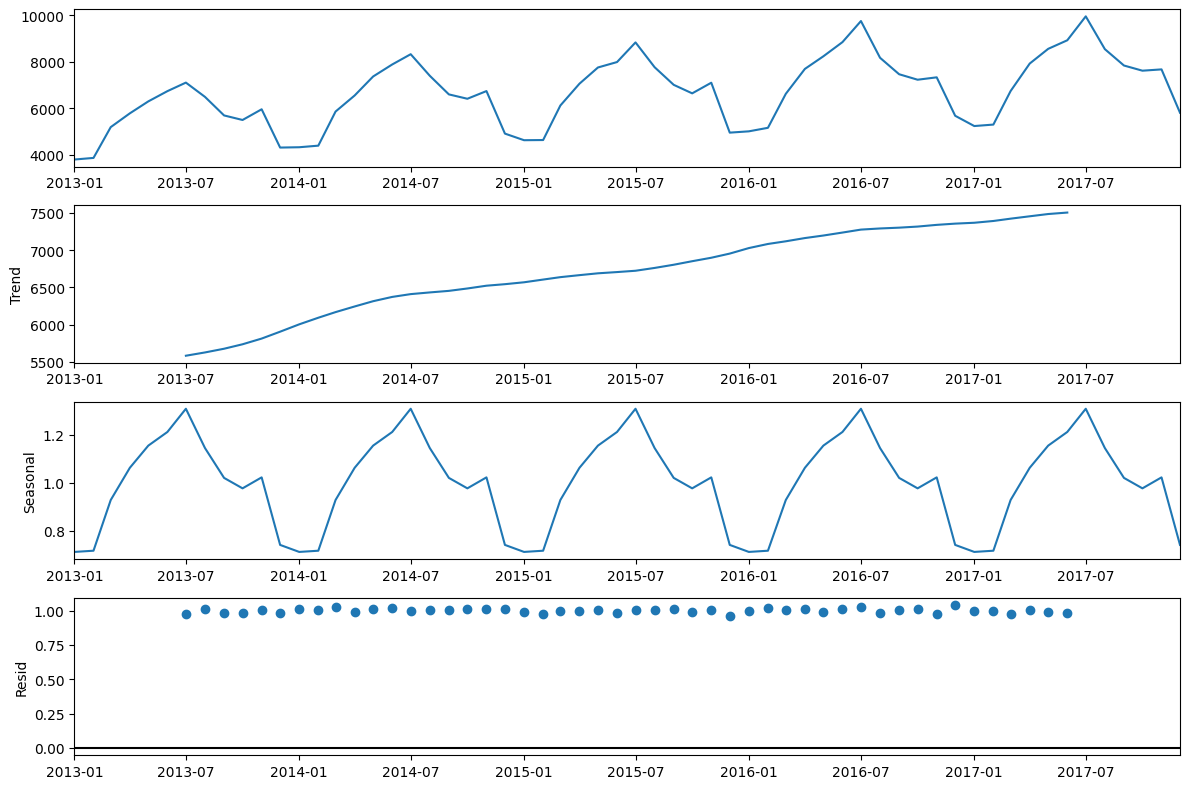

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

c:\programming\venv_307\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\programming\venv_307\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\programming\venv_307\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\programming\venv_307\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\programming\venv_307\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters

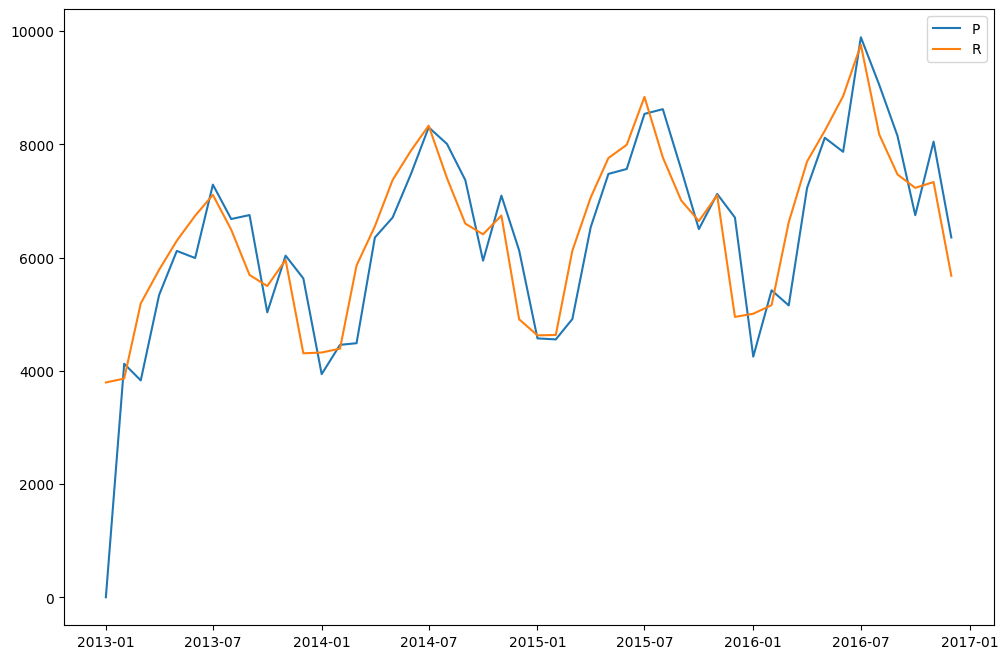

In [319]:
# 7-8.시계열, 이원분석 anova, lm_anova, tsa,
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("./data/arima_data.csv", names=['day','price'])
data.head()
# data.columns = ["day","value"]
data["day"] = pd.to_datetime(data["day"],format="%Y-%m-%d")
data.set_index(["day"], inplace=True)
print(data.info(), data.head())

ts = data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

## 정상성 
from statsmodels.tsa.stattools import adfuller
training = data[:"2016-12-01"]
test = data.drop(training.index)
print(help(adfuller))

# ARIMA
adf = adfuller(training, regression='ct') # c : constant, t : trend , n : no, ctt : linear and quadratic trend  
print(adf)
from statsmodels.api import PCA, OLS, MANOVA
from statsmodels.formula.api import ols 
from statsmodels.tsa import api 
from statsmodels.tsa.arima.model import ARIMA
# PACF, ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(training, order=(2,1,2))
res = model.fit()
res.summary()
plt.plot(res.predict())
plt.plot(training)
plt.legend(["P","R"])
plt.show()


In [345]:
td = data.index[-1] - data.index[0]
print(td.seconds) 
from datetime import timedelta
help(timedelta)


1795
Help on class timedelta in module datetime:

class timedelta(builtins.object)
 |  Difference between two datetime values.
 |  
 |  timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
 |  
 |  All arguments are optional and default to 0.
 |  Arguments may be integers or floats, and may be positive or negative.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(se

In [286]:
# 7-8.
from sklearn.model_selection import train_test_split

data = pd.read_csv("./data/arima_data.csv")
data.columns = ["day","value"]
data["day"] = pd.to_datetime(df["day"],format="%Y-%m-%d")
data.set_index(["day"], inplace=True)
print(data.info(), data.head())
training = data[:"2016-12-01"]
test = data.drop(training.index)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2013-02-01 to 2017-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   59 non-null     int64
dtypes: int64(1)
memory usage: 944.0 bytes
None             value
day              
2013-02-01   3863
2013-03-01   5190
2013-04-01   5783
2013-05-01   6298
2013-06-01   6739


In [289]:
from pmdarima import auto_arima
auto_model = auto_arima(training, start_p=0, d=1, start_q=0,
                        max_p=3, max_q=3, 
                        start_P=0, start_Q=0,
                        max_P=3, max_Q=3, m=12,
                        seasonal=True, information_criterion='aic',
                        trace=True)
# m =12면 달 기준, m  =1 이면 년 단위 
auto_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=469.122, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=469.421, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=469.256, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=470.744, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=470.814, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=468.076, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=469.598, Time=0.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=469.639, Time=0.07 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=469.634, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=467.651, Time=0.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=469.117, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=46

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -231.825
Date:                             Mon, 06 May 2024   AIC                            467.651
Time:                                     16:36:41   BIC                            470.704
Sample:                                 02-01-2013   HQIC                           468.692
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3437      0.176     -1.951      0.051      -0.689       0.002
sigma2      4.933e+04   1.76e+04      2.800      0.005    1.48e+04    8.39e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.30
Prob(Q):                              0.96   Prob(JB):                         0.52
Heteroskedasticity (H):               1.44   Skew:                            -0.15
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [290]:
auto_pred_y= pd.DataFrame(auto_model.predict(n_periods=len(test)), 
                          index=test.index) 
auto_pred_y.columns = ['predicted_price']
auto_pred_y

,predicted_price
day,
2017-01-01,5602.303892
2017-02-01,5754.303892
2017-03-01,7218.303892
2017-04-01,8291.303892
2017-05-01,8834.303892
2017-06-01,9445.303892
2017-07-01,10352.303892
2017-08-01,8770.303892
2017-09-01,8061.303892


In [292]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("r2_score : ", r2_score(test, auto_pred_y))
RMSE = mean_squared_error(test, auto_pred_y)**0.5
print("RMSE : " , RMSE)

r2_score :  0.9330634795097731
RMSE :  366.38210855895846


### GrdidsearchCV 사용법 
- GridSearchCV를 임포트 하고 
- 모델을 선정하고, 모델의 파라미터를 정의해서 넣어준다. 
- 사용법은 fit, predict 를 사용하며 
- 최적의 모델은 model.best_params_ 를 통하여 확인한다. 
- 각 모델별로 파라미터에 대한 이해가 있어야 한다. 

In [294]:
# GridserachCV 사용하여 파라미터를 변경해가면서 최적의 모델을 찾기 
# LinearRegression, LightGBM, RandomForestRegressor 등의 파라미터 자동 세팅 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.cluster import DBSCAN, k_means, KMeans
from sklearn.svm import SVC, SVR

help(SVR)
param = {"C":[0.1, 1, 10, 100],  "gamma" : [0.001, 0.01, 0.1, 1, 10] }

grid_svm = GridSearchCV(SVR(), param_grid=param, cv = 5)
grid_svm.fit(x_trained_scaled, y_train)
result = pd.DataFrame(grid_svm.cv_results_["params"])
result["mean_test_score"] = grid_svm.cv_results_["mean_test_score"]
result.sort_values("mean_test_score", ascending=False)
grid_svm.best_params_



Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

### Model fit 하고 시간 구하기 
- 앞선 예제에서 확인 4.5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None           Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Dat

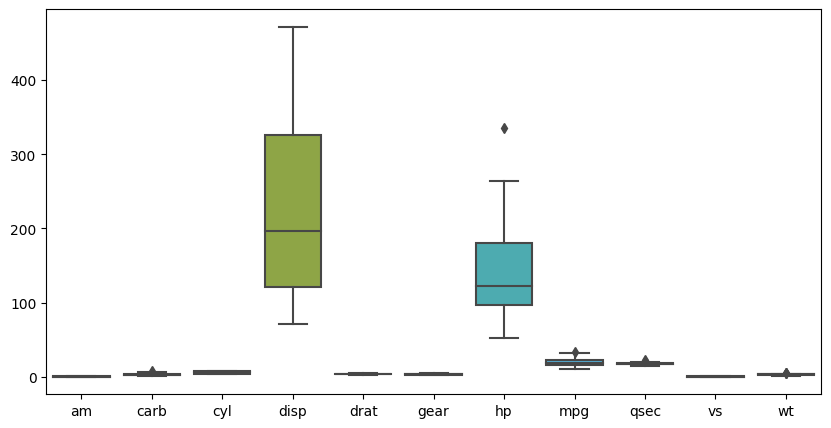

0.5204772390175529

In [299]:
# model fit 하기 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


ll = os.listdir(".\data")
# print(ll)
df = pd.read_csv(".\\data\\mtcars.csv")
print(df.info(), df.head())
df.rename(columns={'Unnamed: 0':'name'}, inplace=True)
df = df[df.columns.difference(["name"])]
print(df.describe(include='all'))

fig, ax = plt.subplots(1,1, figsize=(10,5))

sns.boxplot( data = df, ax = ax)
plt.show()

y = df["mpg"]
x = df[df.columns.difference(["mpg"])]
# clms = df.columns.difference(["target"])
                             
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3 )

reg = LinearRegression()
reg.fit(x_train, y_train)

pred_y = reg.predict(x_test)
r2 = reg.score(x_test, y_test)
r2

# print(df.head())
# def test_model(model, train_x, train_y, test_x, test_y):
#     model.fit(train_x, train_y)
#     model.predict(test_x)

# from sklearn.linear_model import LinearRegression

# reg = LinearRegression()
# reg.fit(x, y)


    

In [239]:
mtcars = pd.read_csv("./data/mtcars.csv")

In [2]:
import pandas as pd

df = pd.DataFrame()

In [3]:
df["date"] = ['2021-01-01']